In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

In [18]:
def orb_detect(img1, img2):
    orb = cv.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    return kp1, kp2, des1, des2

In [28]:
def bf_match(img1, img2, kp1, kp2, des1, des2):
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot()
    res_img = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(res_img)
    plt.show()

In [29]:
def my_match(img1, img2, kp1, kp2, des1, des2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv.DMatch(_distance = hamming(k1, k2) * len(k1),
                                     _imgIdx = 0, _queryIdx = i, _trainIdx = j))
    matches = sorted(matches, key = lambda x: x.distance)

    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot()
    res_img = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(res_img)
    plt.show()

In [30]:
img1 = cv.cvtColor(cv.imread("1.jpeg"), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread("2.jpeg"), cv.COLOR_BGR2RGB)

In [31]:
kp1, kp2, des1, des2 = orb_detect(img1, img2)

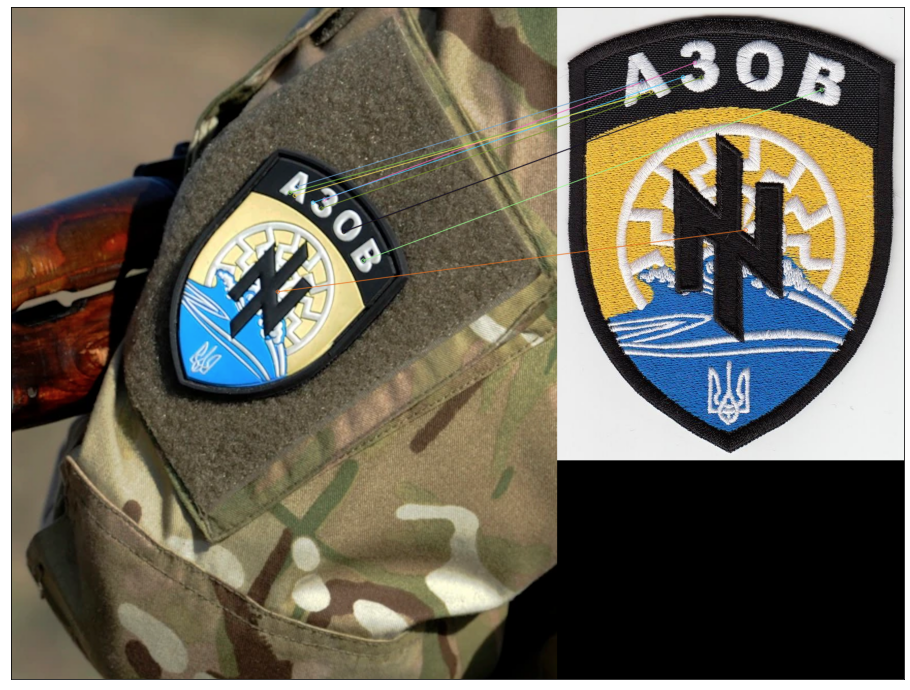

In [32]:
bf_match(img1, img2, kp1, kp2, des1, des2)

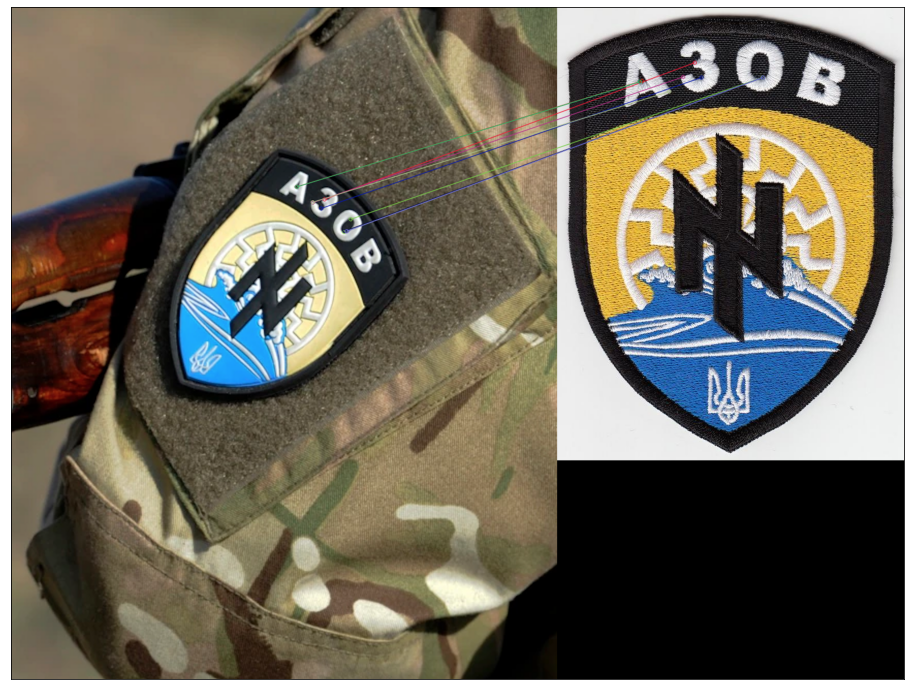

In [33]:
my_match(img1, img2, kp1, kp2, des1, des2)

In [34]:
img3 = cv.cvtColor(cv.imread("3.jpeg"), cv.COLOR_BGR2RGB)
img4 = cv.cvtColor(cv.imread("4.jpeg"), cv.COLOR_BGR2RGB)

In [35]:
kp3, kp4, des3, des4 = orb_detect(img3, img4)

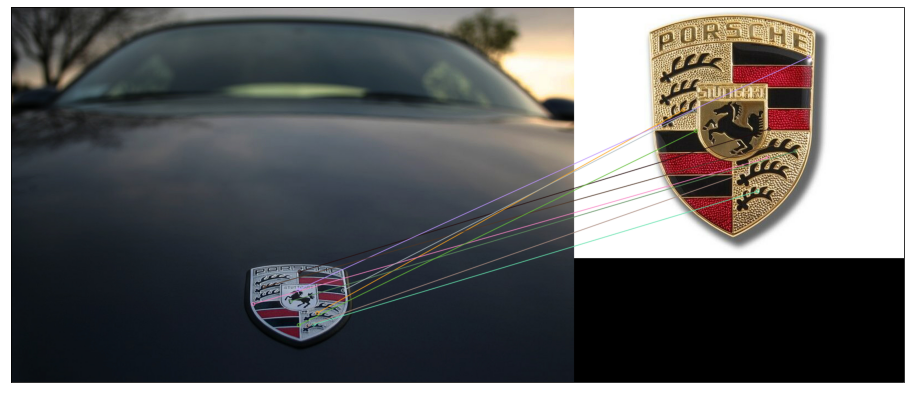

In [36]:
bf_match(img3, img4, kp3, kp4, des3, des4)

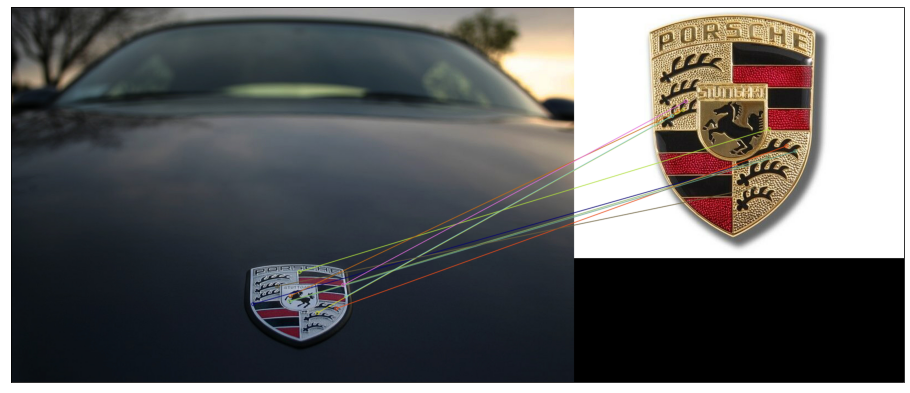

In [37]:
my_match(img3, img4, kp3, kp4, des3, des4)

In [45]:
img5 = cv.cvtColor(cv.imread("1.jpeg"), cv.COLOR_RGB2GRAY)
img6 = cv.cvtColor(cv.imread("2.jpeg"), cv.COLOR_RGB2GRAY)
kp5, kp6, des5, des6 = orb_detect(img5, img6)

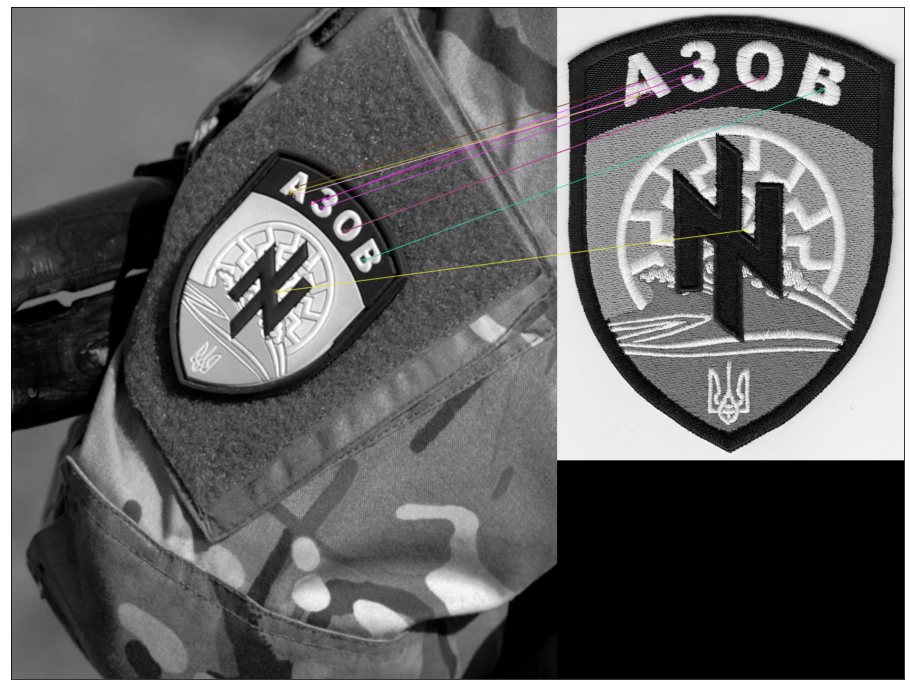

In [46]:
bf_match(img5, img6, kp5, kp6, des5, des6)

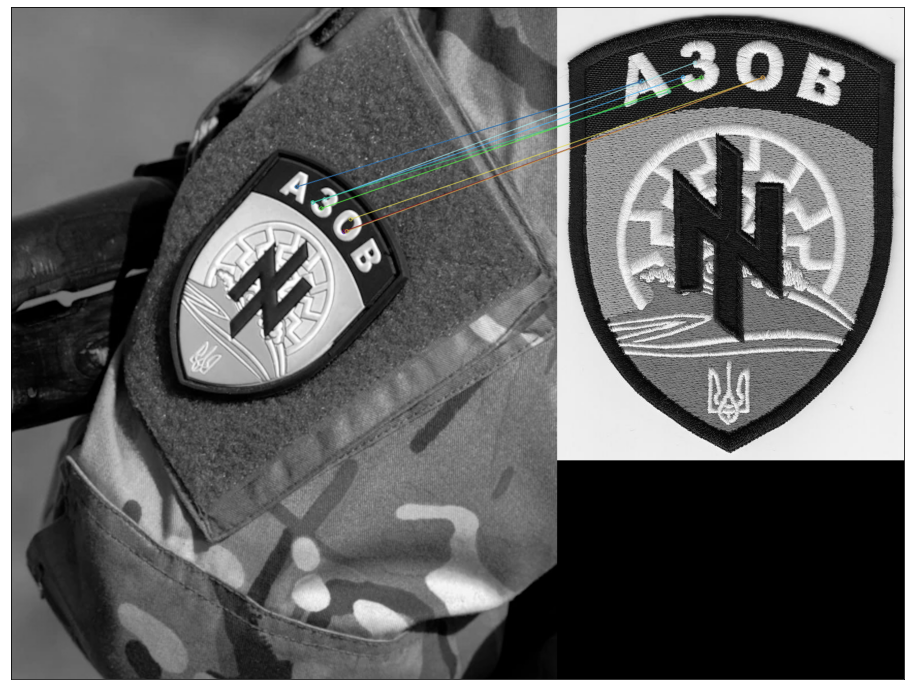

In [47]:
my_match(img5, img6, kp5, kp6, des5, des6)

In [48]:
img7 = cv.cvtColor(cv.imread("3.jpeg"), cv.COLOR_RGB2GRAY)
img8 = cv.cvtColor(cv.imread("4.jpeg"), cv.COLOR_RGB2GRAY)
kp7, kp8, des7, des8 = orb_detect(img7, img8)

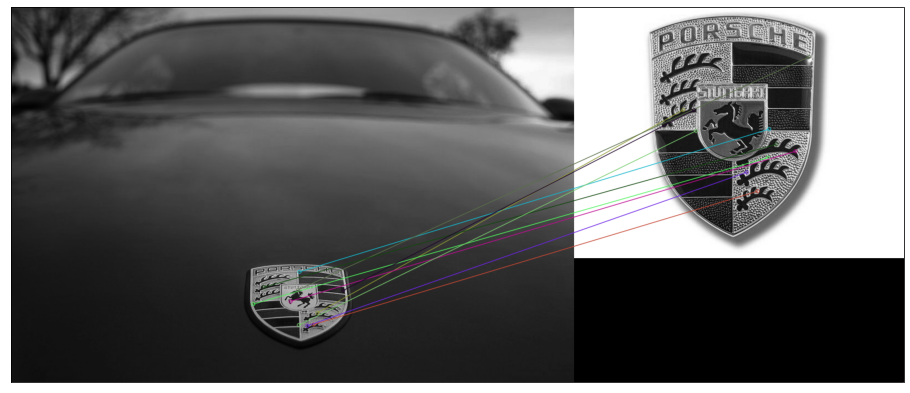

In [49]:
bf_match(img7, img8, kp7, kp8, des7, des8)

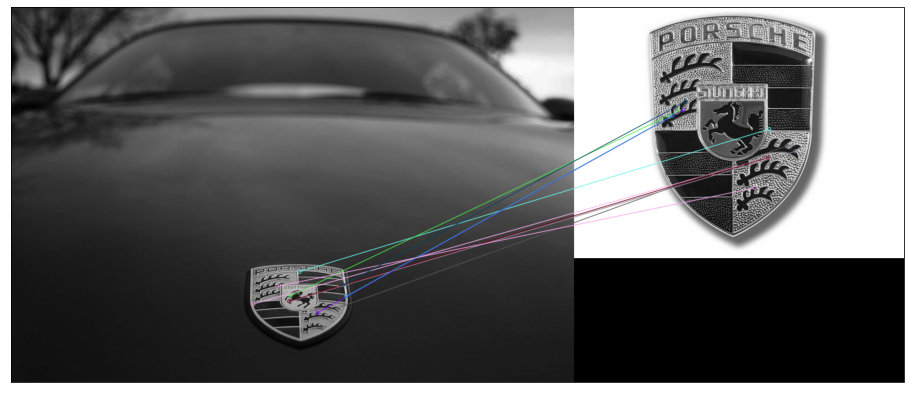

In [50]:
my_match(img7, img8, kp7, kp8, des7, des8)